<a href="https://colab.research.google.com/github/parthe11/DL/blob/main/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train[0]

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[4])

In [11]:
#scaling
X_train = X_train / 255
X_test = X_test / 255

In [20]:
#model architecture
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [27]:
history = model.fit(X_train,y_train,epochs = 25, validation_split = 0.2)

Epoch 1/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0112 - accuracy: 0.9965 - val_loss: 0.1703 - val_accuracy: 0.9725
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0080 - accuracy: 0.9973 - val_loss: 0.1612 - val_accuracy: 0.9722
Epoch 3/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0113 - accuracy: 0.9965 - val_loss: 0.1661 - val_accuracy: 0.9747
Epoch 4/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0078 - accuracy: 0.9976 - val_loss: 0.1722 - val_accuracy: 0.9747
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0102 - accuracy: 0.9965 - val_loss: 0.1762 - val_accuracy: 0.9762
Epoch 6/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.1719 - val_accuracy: 0.9749
Epoch 7/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0080 - accuracy: 0.9975 - val_loss: 0.1704 - val_accuracy

In [28]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [29]:
y_pred = y_prob.argmax(axis = 1)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9762

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

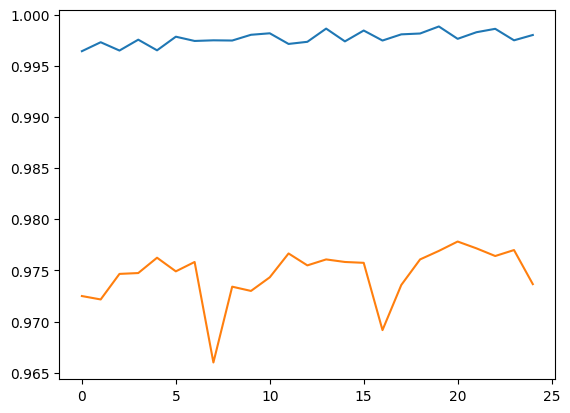

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

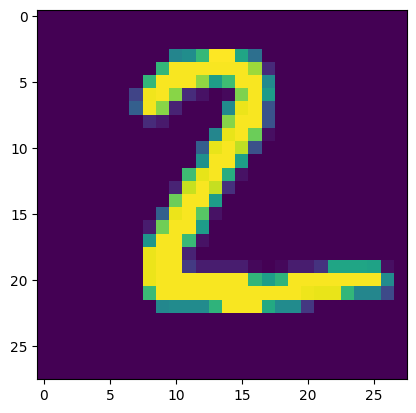

In [39]:
plt.imshow(X_test[1])

In [40]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis = 1)

1/1 [==============================] - 0s 67ms/step


array([2])